<a href="https://colab.research.google.com/github/gamante91/Q-Learning-openAI-gym-Taxi-V2/blob/master/Taxi_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
'''
import section
'''
from collections import defaultdict
import gym
import gym.spaces
import math
import matplotlib.pyplot as plt
import numpy as np
import sys
from time import sleep

In [51]:
'''
constants and free functions
'''
epsilon_max = 0.95

def select_epsilon_greedy_action(Q_s, nA, epsilon):
    return np.argmax(Q_s) if np.random.sample() < epsilon else np.random.choice(nA)

def select_greedy_action(Q_s):
    return np.argmax(Q_s)

clear = lambda : sys.stdout.flush()

def render(env, info):
    clear()
    env.render()

    if 'state' in info:
        print("state:", info['state'])
    if 'action' in info:
        print("action:", info['action'])
    if 'reward' in info:
        print("reward:", info['reward'])
        if 'done' in info and info['done']:
            print("game ended")
            print("you won! :)") if info['reward'] > 0 else print("you lost! :(")
    
    sleep(0.1)
    
def moving_average(x, window):
    return np.convolve(x, np.ones((window,))/window, mode='valid')

def plot_training_figures(counts, rewards, window=100):
    
    counts_means = moving_average(counts,window)
    counts_rewards = moving_average(rewards,window)
    x = range(0,len(counts_means))
    
    plt.rcParams["figure.figsize"][0] = 15
    plt.rcParams["figure.figsize"][1] = 6
    
    plt.subplot(1, 2, 1)
    plt.plot(x,counts_means,linewidth=4)
    plt.xlabel("episode")
    plt.ylabel("actions to reach a goal")
    plt.title("number of action needed to reach a goal")
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(x,counts_rewards,linewidth=4)
    plt.xlabel("episode")
    plt.ylabel("reward")
    plt.title("rewards")
    plt.grid(True)
    
    plt.show()

In [53]:
class Agent:
  
    ''' 
    agent's constructor
    '''
    def __init__(self, nA):
        self.nA = nA
        self.Q = defaultdict(lambda: np.zeros(self.nA))
    
    '''
    trains the agent over a fixed number of episodes using Q-learning
    '''
    def train(self, env, num_episodes, alpha, gamma, epsilon):
        counts = []
        rewards = []
        max_reward = -math.inf
    
        for i_episode in range(1, num_episodes+1):
            state = env.reset()
            done = False
            count = 0
            tot_reward = 0
            eps = max(epsilon * i_episode, epsilon_max)
      
            while not done:
                action = select_epsilon_greedy_action(self.Q[state], self.nA, eps)
                next_state, reward, done, _ = env.step(action)
                count += 1
                tot_reward += reward
        
                '''
                updates internal Q table using Q-learning update rule
                '''
                self.Q[state][action] += alpha * (reward + gamma * self.Q[next_state][np.argmax(self.Q[next_state])] - self.Q[state][action])
                state = next_state
        
            counts.append(count)
            rewards.append(tot_reward)
            max_reward = max(max_reward, tot_reward)
   
        return counts, rewards
      
    '''
    plays with the environment
    '''
    def play(self, env):
        state = env.reset()
        done = False
        tot_reward = 0
    
        while not done:
            action = select_greedy_action(self.Q[state])
            state, reward, done, _ = env.step(action)
            tot_reward += reward
      
            info = {'state': state, 'action': action, 'reward': reward, 'done': done}
            render(env, info)

In [54]:
env = gym.make('Taxi-v2')

agent = Agent(env.action_space.n)
train_counts, train_rewards = agent.train(env, 20000, 0.1, 0.9, 0.1)

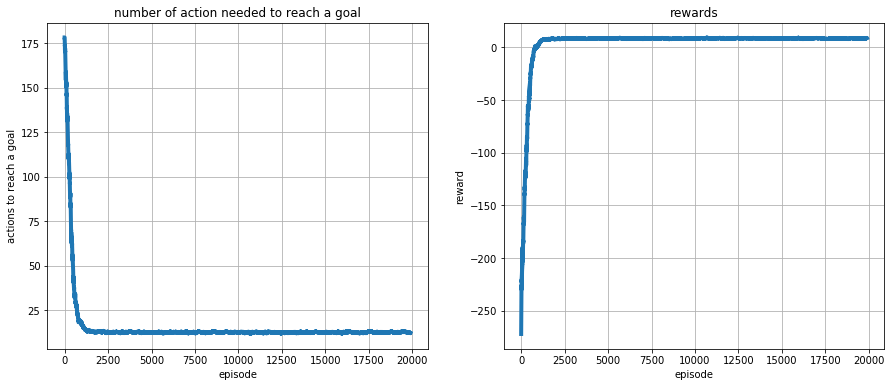

In [55]:
plot_training_figures(train_counts, train_rewards)

In [56]:
frames = agent.play(env)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
state: 206
action: 1
reward: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
state: 106
action: 1
reward: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
state: 126
action: 2
reward: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
state: 146
action: 2
reward: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
state: 166
action: 2
reward: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
state: 186
action: 2
reward: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
state: 86
action: 1
reward: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
state: 98
action: 4
reward: 